# Predict Using Random Forest Classifier


We are using scikit-learn Random Forest Classifier to predict, if a particular student has already completed **test preparation course** using *math, reading score,* and	*writing scores* given.

* so given how well they did in the course if we can predict if they did the preparation course before doing the course


***YOUR TURN*** Import pandas and numpy 

In [1]:
# plotting
import pandas as pd # pandas
import numpy as np # numpy

**YOUR TURN**  read the data from csv file

path = "data/StudentsPerformance.csv"

***name*** your dataset ***df*** so the name will match with my code at the end of the notebook

In [2]:
# read csv
df = pd.read_csv("data/StudentsPerformance.csv")

**YOUR TURN**  Read top few rows from the file using the head() method of Pandas.

In [3]:
df.head(10) # top 10 rows from csv

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**YOUR TURN** Check missing values

.<code>isnull()</code> and <code>sum()</code> is used to find whether there are any missing values in the CSV file.

In [4]:
df.isnull().sum() # checking missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

* We are going to consider the numerical features only for this first part of the task


**YOUR TURN**  create a subset of the dataset called features from the original dataset and print the head

hint.  df[['math score','reading score', 'writing score']]

In [5]:
features = df[['math score','reading score', 'writing score']]
features.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


**YOUR TURN**  create a subset of the dataset called labels that only contains 'test preparation course' (our target)

In [6]:
# get test preparation course values
labels = df['test preparation course']

**YOUR TURN**  import the library Seaborn and plot the pairplot graph of the original dataset using the target 'test preparation course' as the hue of the graph
* notice that the graph simply discards the categorical values of the features but registers the categorical values of the target

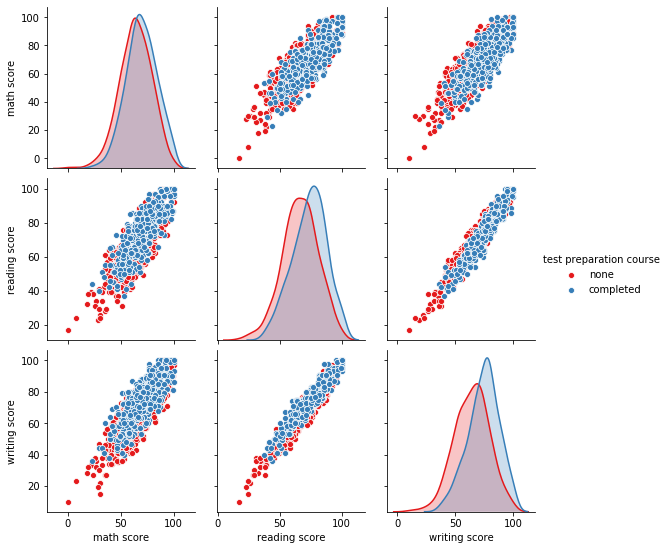

In [7]:
import seaborn as sns
sns.pairplot(df,hue='test preparation course',palette='Set1')

* do you think the data are easily separable by a decision tree algorithm? Probably yes
* if so will the algorithm generalise well on unseen data? For answer this last question we need to evaluate the model.

**YOUR TURN** Split the data into train and test set
    use the variables that you created above
* use x = features 
* use y = labels
* remember to import the library from sklearn.model_selection import train_test_split

Split arrays or matrices into random *train* and *test* subsets.

In [8]:
# split train test data set
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(features, labels, random_state = 10)

## Random Forest Classifier

**Random Forest Classifier**

<p>A random forest is* a meta estimator* that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.</p>

<code>n_estimators</code> <i>integer, optional (default=10)</i>  The number of trees in the forest.<br/>



***YOUR TURN*** 
*import the random forest classifier library
*create a random forest classifier object with 10 estimator

In [9]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 10) 

**Fit X_Train and y_Train**

<code>fit(()</code>Build a forest of trees from the training set (X, y).

***YOUR TURN*** fit the X_train and y_train to the classifier that you have created

In [10]:
RandomForest.fit(X_Train, y_Train) # fit data points and labels

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

***YOUR TURN*** print the score of the training data 
hint: use score method and X_train and y_train

<code>score()</code> Returns the mean accuracy on the given test data and labels.

In [11]:
RandomForest.score(X_Train, y_Train)

0.98

***YOUR TURN*** print the score of the testing data 
hint: use score method and X_test and y_test

In [12]:
RandomForest.score(X_Test, y_Test)

0.584

Looks like the model is not able to generalise very well on unseen data. Let's investigate more evaluation metrics

**Predict** we are using strings (letters) in the labels column (Random Forest allows us to do so)

***YOUR TURN*** store in a variable called predictions the predicted values of the classifier for the X_test using the predict methos

In [13]:
predictions = RandomForest.predict(X_Test)

***YOUR TURN*** import from sklearn.metrics import classification_report and print the classification report of your true labels y_test compared to the predictions

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_Test,predictions))

              precision    recall  f1-score   support

   completed       0.43      0.46      0.44        90
        none       0.68      0.66      0.67       160

    accuracy                           0.58       250
   macro avg       0.55      0.56      0.55       250
weighted avg       0.59      0.58      0.59       250



### EXTRA 

we only used 3 features of our dataset. Will the other features create a better classifier?

***df*** is the name of the original dataset if you have used another name please change the name accordingly

In [15]:
# here we are storing all the features from the original dataset 

featuresAll = df.drop('test preparation course',axis=1)

In [16]:
featuresAll.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75


***we are converting the categorical values into number 0 or 1 using the dummies method in pandas as we did last time***
in theory DT can work even without this step but scikit learn has not implemented this yet

In [17]:
featuresAll = pd.get_dummies(featuresAll, columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch'],
                            drop_first = True)

In [18]:
featuresAll.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1


### YOUR TURN

* split the data again : featuresAll are the features and labels are the labels

In [19]:
# test split on the data 
X_Train, X_Test, y_Train, y_Test = train_test_split(featuresAll, labels)

***YOUR TURN*** create a second classifier name it RandomForest2 again with 10 estimator

In [20]:
RandomForest2 = RandomForestClassifier(n_estimators = 10)

***YOUR TURN*** fit the X_train and y_train to the new classifier

In [21]:
RandomForest2.fit(X_Train, y_Train) # fit data points and labels

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

***YOUR TURN*** print the score for training and for testing

In [22]:
RandomForest2.score(X_Train, y_Train)

0.9813333333333333

In [23]:
RandomForest2.score(X_Test, y_Test)

0.628

***Do you see an improvement in the model***?

remember that Random Forest is random so it is not always so clear to answer this question

***YOUR TURN*** create the predictions from the X_test and print the classification report

**Predict** we are using strings (letters) in the labels column (Random Forest allows us to do so)

In [24]:
predictions = RandomForest2.predict(X_Test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_Test,predictions))

              precision    recall  f1-score   support

   completed       0.45      0.49      0.47        84
        none       0.73      0.70      0.71       166

    accuracy                           0.63       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.64      0.63      0.63       250



### YOUR TURN

* print the features importances
* in the solution you will see a different method that turns the result into a dataframe for nicer plotting and the ability to sort the result

In [26]:
feature_importances = pd.DataFrame(RandomForest2.feature_importances_, index = featuresAll.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
writing score,0.254555
math score,0.241828
reading score,0.219656
gender_male,0.035470
lunch_standard,0.034676
parental level of education_some college,0.034514
race/ethnicity_group D,0.032621
race/ethnicity_group C,0.028449
parental level of education_some high school,0.027178
race/ethnicity_group B,0.023519


***the addition of the other features might not improve the model*** 

*  there is a big step beween the reading/math score and the first added feature but maybe...

***YOUR TURN*** try to increase the number of estimator on both classifiers and see the results
***simply change the parameter in the codes above*** do not write it again. Try 1000 for example

* In conclusion The problem is that we probably need more data. 


* or we could try other models. but in this case we will have to label encode the target value